In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Defining helper functions
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_image(image_path):
  """Carga una imagen desde una ruta dada y la normaliza a [0, 1]."""
  image = tf.io.read_file(image_path)
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.expand_dims(image, axis=0) # Añade una dimensión de lote
  return image

def display_images(low_res, super_res):
  """Muestra la imagen de baja y alta resolución lado a lado."""
  plt.figure(figsize=(10, 5))

  # Mostrar imagen de baja resolución
  plt.subplot(1, 2, 1)
  plt.title("Imagen de Baja Resolución")
  plt.imshow(tf.cast(tf.clip_by_value(tf.squeeze(low_res), 0, 1) * 255, tf.uint8)) # Escala a 0-255 y convierte a uint8
  plt.axis('off')

  # Mostrar imagen de superresolución
  plt.subplot(1, 2, 2)
  plt.title("Imagen de Super Resolución")
  plt.imshow(tf.cast(tf.clip_by_value(tf.squeeze(super_res), 0, 1) * 255, tf.uint8)) # Escala a 0-255 y convierte a uint8
  plt.axis('off')

  plt.show()

# Carga el modelo ESRGAN
model = hub.load("https://www.kaggle.com/models/kaggle/esrgan-tf2/TensorFlow2/esrgan-tf2/1")

# Especifica la ruta a tu imagen de baja resolución
ruta_imagen_lr = "mdb002.jpg" # ¡Reemplaza esto!

# Carga la imagen
low_resolution_image = load_image(ruta_imagen_lr)

# Realiza la superresolución
super_resolution = model(low_resolution_image)

# Muestra los resultados
display_images(low_resolution_image, super_resolution)

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: /Users/mafer/Documents/8vo/Aplicaciones Avanzadas/IA/Reto/cancer_detection/mdb002.jpg : El sistema no puede encontrar la ruta especificada.
; No such process [Op:ReadFile]

In [ ]:
model = hub.load("https://www.kaggle.com/models/kaggle/esrgan-tf2/TensorFlow2/esrgan-tf2/1")

low_resolution_image = load_image("/Users/mafer/Documents/8vo/Aplicaciones Avanzadas/IA/Reto/cancer_detection/mdb002.jpg") # Reemplaza con la ruta de tu imagen
super_resolution = model(low_resolution_image)

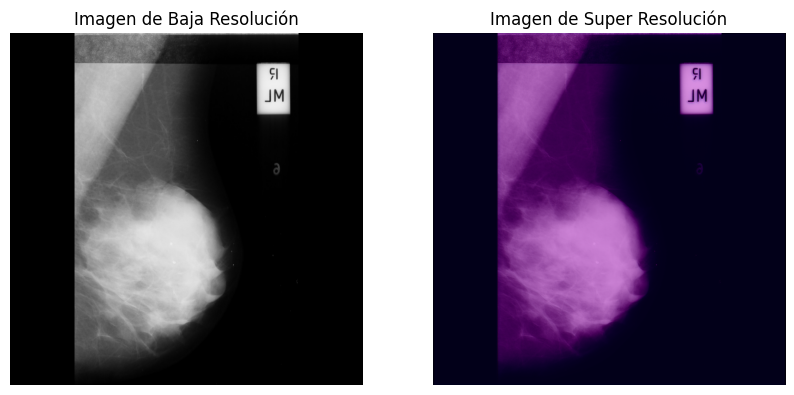

In [ ]:
def display_images(low_res, super_res):
  """Muestra la imagen de baja y alta resolución lado a lado."""
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Imagen de Baja Resolución")
  plt.imshow(tf.squeeze(low_res))
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title("Imagen de Super Resolución")
  plt.imshow(tf.squeeze(super_res))
  plt.axis('off')

  plt.show()

display_images(low_resolution_image, super_resolution)

In [ ]:
psnr_value = tf.image.psnr(tf.clip_by_value(low_resolution_image, 0, 255), super_resolution, max_val=255)
ssim_value = tf.image.ssim(low_resolution_image, super_resolution, max_val=255)

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached wrapt-1.17.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached k